In [60]:
import pandas as pd
import numpy as np

In [61]:
df = pd.read_csv(r"C:\Users\alisa\OneDrive\Desktop\Machine Learning Note\Malware dataset.csv")
df.sample(2)

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
47963,com.google.android.apps.docs.editors.docs.apk,963,benign,65536,0,3069595648,18391,0,0,0,...,55,1,120,1,3204448256,401004,5,2,0,0
24050,com.miniclip.dudeperfect.apk,50,benign,0,0,3069456384,15709,0,0,0,...,109,0,120,0,3204448256,384273,4,1,0,0


In [62]:
df.drop(columns='hash' , inplace=True)

In [63]:
df.sample(2)

,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
99166,166,malware,4096,0,3070148608,13988,0,0,0,10406,...,2,1,120,0,3204448256,371979,3,0,0,0
25380,380,benign,0,0,3069714432,15450,0,0,0,15792,...,53,1,120,4,3204448256,384381,5,4,0,0


In [64]:
df.isnull().sum()

millisecond          0
classification       0
state                0
usage_counter        0
prio                 0
static_prio          0
normal_prio          0
policy               0
vm_pgoff             0
vm_truncate_count    0
task_size            0
cached_hole_size     0
free_area_cache      0
mm_users             0
map_count            0
hiwater_rss          0
total_vm             0
shared_vm            0
exec_vm              0
reserved_vm          0
nr_ptes              0
end_data             0
last_interval        0
nvcsw                0
nivcsw               0
min_flt              0
maj_flt              0
fs_excl_counter      0
lock                 0
utime                0
stime                0
gtime                0
cgtime               0
signal_nvcsw         0
dtype: int64

In [65]:
df.shape

(100000, 34)

In [66]:
df = df.sample(100000)

In [67]:
df.head(4)

,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
51317,317,benign,0,0,3069292544,15849,0,0,0,10903,...,0,1,120,0,3204448256,376490,3,0,0,0
53835,835,benign,0,0,3069784064,19573,0,0,0,15061,...,172,1,120,2,3204448256,388109,4,5,0,0
54413,413,benign,0,0,3069812736,16559,0,0,0,19563,...,18,1,120,1,3204448256,392959,5,1,0,0
26613,613,benign,2277376,0,3069960192,17027,0,0,0,17923,...,121,1,120,1,3204448256,392733,5,3,0,0


In [68]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target'] = le.fit_transform(df['classification'])

In [69]:
df.sample(2)

,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,...,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw,target
84600,600,malware,122880,0,3069480960,22191,0,0,0,18617,...,0,114,2,3204448256,395729,5,1,0,0,1
63190,190,malware,1036288,0,3069493248,22175,0,0,0,15104,...,1,114,2,3204448256,381646,4,0,0,0,1


In [70]:
df.drop(columns='classification' , inplace=True)

In [71]:
df.sample(2)
X=df.drop(columns='target')
y=df['target']

In [72]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [73]:
print(X.sample(1))
print(y.sample(1))

      millisecond  state  usage_counter        prio  static_prio  normal_prio  \
1134          134      0              0  3069403136        16447            0   

      policy  vm_pgoff  vm_truncate_count  task_size  ...  nivcsw  min_flt  \
1134       0         0              18626          0  ...       0        1   

      maj_flt  fs_excl_counter        lock   utime  stime  gtime  cgtime  \
1134      120                0  3204448256  390324      5      0       0   

      signal_nvcsw  
1134             0  

[1 rows x 33 columns]
97061    1
Name: target, dtype: int32


In [74]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=.3,random_state=42)

In [75]:
clf1 = LinearRegression()
clf2 = LogisticRegression()
clf3=KNeighborsClassifier()

clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
clf3.fit(X_train,y_train)

y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
y_pred3 = clf3.predict(X_test)

from sklearn.preprocessing import Binarizer

# Assuming y_pred is the predicted probability and y_true is the true binary label
y_pred_binarized1 = (y_pred1 > 0.5).astype(int)  # Convert probabilities to 0 or 1
print(accuracy_score(y_test, y_pred_binarized1))
y_pred_binarized2 = (y_pred1 > 0.5).astype(int)  # Convert probabilities to 0 or 1
print(accuracy_score(y_test, y_pred_binarized2))
y_pred_binarized3 = (y_pred1 > 0.5).astype(int)  # Convert probabilities to 0 or 1
print(accuracy_score(y_test, y_pred_binarized3))


C:\Users\alisa\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8833333333333333
0.8833333333333333
0.8833333333333333


In [76]:
scale = StandardScaler()

X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [77]:
X_train

array([[-0.44057925, -0.17218867,  0.        , ..., -0.50712311,
         0.        ,  0.        ],
       [-0.81786647, -0.17218867,  0.        , ..., -0.50712311,
         0.        ,  0.        ],
       [-0.63095354, -0.17218867,  0.        , ..., -0.1999194 ,
         0.        ,  0.        ],
       ...,
       [ 0.61513269, -0.17218867,  0.        , ..., -0.50712311,
         0.        ,  0.        ],
       [ 0.09939145, -0.17218867,  0.        , ..., -0.50712311,
         0.        ,  0.        ],
       [ 1.12741259,  0.97289439,  0.        , ..., -0.1999194 ,
         0.        ,  0.        ]])

In [78]:
clf1 = LinearRegression()
clf2 = LogisticRegression()
clf3=KNeighborsClassifier()

clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
clf3.fit(X_train,y_train)

y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
y_pred3 = clf3.predict(X_test)


In [79]:
from sklearn.preprocessing import Binarizer

# Assuming y_pred is the predicted probability and y_true is the true binary label
y_pred_binarized1 = (y_pred1 > 0.5).astype(int)  # Convert probabilities to 0 or 1
print(accuracy_score(y_test, y_pred_binarized1))
y_pred_binarized2 = (y_pred1 > 0.5).astype(int)  # Convert probabilities to 0 or 1
print(accuracy_score(y_test, y_pred_binarized2))
y_pred_binarized3 = (y_pred1 > 0.5).astype(int)  # Convert probabilities to 0 or 1
print(accuracy_score(y_test, y_pred_binarized3))

0.8847666666666667
0.8847666666666667
0.8847666666666667


PCA

In [80]:
pca = PCA(n_components=10)

X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [81]:
clf1 = LinearRegression()
clf2 = LogisticRegression()
clf3=KNeighborsClassifier()

clf1.fit(X_train_trf,y_train)
clf2.fit(X_train_trf,y_train)
clf3.fit(X_train_trf,y_train)

y_pred1 = clf1.predict(X_test_trf)
y_pred2 = clf2.predict(X_test_trf)
y_pred3 = clf3.predict(X_test_trf)

In [82]:
# Assuming y_pred is the predicted probability and y_true is the true binary label
y_pred_binarized1 = (y_pred1 > 0.5).astype(int)  # Convert probabilities to 0 or 1
print(accuracy_score(y_test, y_pred_binarized1))
y_pred_binarized2 = (y_pred1 > 0.5).astype(int)  # Convert probabilities to 0 or 1
print(accuracy_score(y_test, y_pred_binarized2))
y_pred_binarized3 = (y_pred1 > 0.5).astype(int)  # Convert probabilities to 0 or 1
print(accuracy_score(y_test, y_pred_binarized3))

0.8134666666666667
0.8134666666666667
0.8134666666666667


In [83]:
pca.explained_variance_

array([8.57694057, 2.41635232, 2.03948804, 1.55757045, 1.36272727,
       1.07307468, 0.99668566, 0.93342018, 0.83547594, 0.53766471])

In [85]:
pca.components_.shape

(10, 33)

In [84]:
pca.explained_variance_ratio_

array([0.38984794, 0.10983054, 0.09270091, 0.0707963 , 0.06194008,
       0.0487745 , 0.04530238, 0.04242678, 0.03797491, 0.02443849])

In [86]:
pca = PCA(n_components=None)

X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [87]:
pca.explained_variance_.shape

(33,)

In [89]:
pca.components_.shape # 33 PC in 33-D space

(33, 33)

In [90]:
pca.explained_variance_ratio_ # i need sum(explained_variance_ratio_)=90% like 3.89 + 1.0 =4.89+9.27 = 14.16

array([3.89847940e-01, 1.09830535e-01, 9.27009118e-02, 7.07962967e-02,
       6.19400838e-02, 4.87744960e-02, 4.53023834e-02, 4.24267757e-02,
       3.79749133e-02, 2.44384905e-02, 1.96652978e-02, 1.70210993e-02,
       1.11445224e-02, 9.91756792e-03, 7.01810589e-03, 4.87272949e-03,
       3.41547635e-03, 1.56247092e-03, 8.80541480e-04, 4.69362444e-04,
       3.87372776e-17, 3.13794595e-17, 2.45728301e-17, 1.83573454e-17,
       1.36823969e-17, 5.37115097e-18, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [91]:
np.cumsum(pca.explained_variance_ratio_)

array([0.38984794, 0.49967847, 0.59237939, 0.66317568, 0.72511577,
       0.77389026, 0.81919265, 0.86161942, 0.89959434, 0.92403283,
       0.94369812, 0.96071922, 0.97186375, 0.98178131, 0.98879942,
       0.99367215, 0.99708763, 0.9986501 , 0.99953064, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

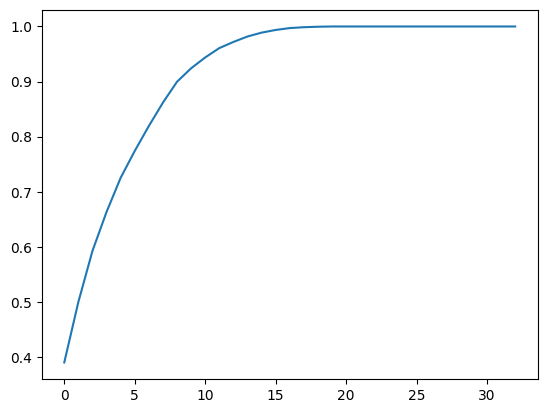

In [92]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))